In [53]:
import json
import math
import os
import shutil
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import PercentFormatter
import matplotlib.lines as mlines


In [54]:
#Generic function
def normalize_column(df, column_name):
    column = df[column_name]
    normalized_column = (column - column.min()) / (column.max() - column.min())
    return normalized_column

def estrai_ultime_sei_cifre(numero):
    return str(numero)[-6:]

In [55]:
def graficoTensor(df, dfStep , column, name):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
          '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#8c6d31',
          '#9c9ede', '#cedb9c', '#e7cb94', '#e7969c', '#de9ed6',
          '#c7c7c7', '#b5cf6b', '#d6616b', '#dadaeb', '#637939',
          '#7b4173', '#ce6dbd', '#9c9ede', '#e7cb94', '#c6dbef',
          '#e9a3c9', '#b5cf6b', '#7f7f7f', '#c7c7c7']    
    labels =dfStep.iloc[:, 1]
    dfStep = dfStep.iloc[:, 0]
    dfSmooth = df.iloc[:, column].rolling(window=10).mean()
    cumulative_sum_df = dfStep.cumsum(axis=0)
# da rivedere --> testato é corretto
    x = cumulative_sum_df.max()
    y = df.iloc[:, 0].max()
    z = y/x
    dfStep = dfStep.mul(z)
    cumulative_sum_df = dfStep.cumsum(axis=0)
# 
    fig, ax = plt.subplots(figsize=(35, 15))

    ax.plot(df.iloc[:, 0],df.iloc[:, column], color="#3399e6", lw=2, alpha=0.5)
    ax.plot(df.iloc[:, 0],dfSmooth, color="red", lw=2)

    #solo per cumultaive reward 
    if column == 5:
        ax.axhline(y=6, linestyle='--', color='gray')
        ax.text(0, 10, 'Obiettivo raggiunto', fontsize=12, color='black', )

    for i, val in enumerate(cumulative_sum_df):
        if i == 0 :
            ax.axvspan(0, val, facecolor=colors[i], alpha=0.5)
            ax.text(0, df.iloc[:, column].min(), labels[i], fontsize=13, color='black', rotation="vertical")
        if i != 0 :
            ax.axvspan(val-1000, val, facecolor=colors[i], alpha=0.8)
            ax.axvspan(cumulative_sum_df[i-1], val, facecolor=colors[i], alpha=0.4)
            ax.text(((cumulative_sum_df[i-1] + cumulative_sum_df[i])/2), df.iloc[:, column].min() , labels[i], fontsize=13, color='black', rotation="vertical")
   
    plt.title('Grafico '+ df.columns[column])
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[column])
    rename =  df.columns[column].replace("/", "-")
    # plt.savefig(f'../../../LogTraining/{name}/TensorBoard/Grafico '+ rename + '.svg', format='svg', transparent=True)

In [56]:
def graficoTensorLosses(df, dfStep , column, nome, name):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
          '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#8c6d31',
          '#9c9ede', '#cedb9c', '#e7cb94', '#e7969c', '#de9ed6',
          '#c7c7c7', '#b5cf6b', '#d6616b', '#dadaeb', '#637939',
          '#7b4173', '#ce6dbd', '#9c9ede', '#e7cb94', '#c6dbef',
          '#e9a3c9', '#b5cf6b', '#7f7f7f', '#c7c7c7']    
    labels =dfStep.iloc[:, 1]
    dfStep = dfStep.iloc[:, 0]
    cumulative_sum_df = dfStep.cumsum(axis=0)
# da rivedere --> testato é corretto
    x = cumulative_sum_df.max()
    y = df.iloc[:, 0].max()
    z = y/x
    dfStep = dfStep.mul(z)
    cumulative_sum_df = dfStep.cumsum(axis=0)
# 
    fig, ax = plt.subplots(figsize=(35, 15))

    ax.plot(df.iloc[:, 0],df.iloc[:, column], color="blue", lw=2, alpha=0.5)


    for i, val in enumerate(cumulative_sum_df):
        if i == 0 :
            ax.axvspan(0, val, facecolor=colors[i], alpha=0.5)
            ax.text(0, df.iloc[:, column].min(), labels[i], fontsize=13, color='black', rotation="vertical")
        if i != 0 :
            ax.axvspan(val-100, val, facecolor=colors[i], alpha=0.8)
            ax.axvspan(cumulative_sum_df[i-1], val, facecolor=colors[i], alpha=0.4)
            ax.text(((cumulative_sum_df[i-1] + cumulative_sum_df[i])/2), df.iloc[:, column].min() , labels[i], fontsize=13, color='black', rotation="vertical")
   
    plt.title('Grafico '+ nome)
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[column])
    # plt.savefig(f'../../../LogTraining/{name}/TensorBoard/Grafico '+ nome + '.svg', format='svg', transparent=True)

In [57]:
def graficoTensorEnvironmentCumulativeReward(df, dfStep , name):
    colors = [
        '#1f77b4',
        '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
          '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#8c6d31',
          '#9c9ede', '#cedb9c', '#e7cb94', '#e7969c', '#de9ed6',
          '#c7c7c7', '#b5cf6b', '#d6616b', '#dadaeb', '#637939',
          '#7b4173', '#ce6dbd', '#9c9ede', '#e7cb94', '#c6dbef',
          '#e9a3c9', '#b5cf6b', '#7f7f7f', '#c7c7c7']    

    ylim = -40 
    labels =dfStep['Environment']
    dfWall = dfStep['Wall']
    dfminScore = dfStep['MinScore']

    df['Nome_Colonna_Normalizzata'] = df.iloc[:, 0] - dfWall.iloc[0]
    dfWall = dfWall - dfWall.iloc[0]
    
    dfSmooth = df.iloc[:, 2].rolling(window=10).mean()

    fig, ax = plt.subplots(figsize=(35, 15))
   
    ax.plot(df['Nome_Colonna_Normalizzata'],df.iloc[:, 2], color="#3399e6", lw=2, alpha=0.5, label="Cumulative Reward")
    ax.plot(df['Nome_Colonna_Normalizzata'],dfSmooth, color="red", alpha=0.7, lw=2, label="Cumulative Reward Smoothed")

    for i, val in enumerate(dfWall):
        if i == 0 :
            #print(dfWall[i])
            #print(dfWall[i + 1])
            ax.axvspan(dfWall[i]- 0.2, dfWall[i], facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfWall[i],dfWall[i + 1], facecolor=colors[i], alpha=0.4)
            ax.hlines(
                y=float(dfminScore[i]), 
                linestyle='--', 
                color='black',
                lw=1,
                xmin=dfWall[i], 
                xmax= dfWall[i + 1], 
                label=f"min score: {labels[i]}" 
            )
            ax.text((dfWall[i] + dfWall[i + 1])/2, ylim +2, labels[i], fontsize=8, color='black', rotation="vertical")
        if i != 0 and labels[i]!= "End" :
            ax.axvspan(dfWall[i] , dfWall[i] + 0.2, facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfWall[i], dfWall[i + 1], facecolor=colors[i], alpha=0.4)
            ax.hlines(
                y=float(dfminScore[i]), 
                linestyle='--', 
                color='black',
                lw=1,
                xmin=dfWall[i],
                xmax=dfWall[i + 1],
                label=f"min score: {labels[i]}"
            )
            ax.text((dfWall[i] + dfWall[i + 1])/2, ylim +2 , labels[i], fontsize=8, color='black', rotation="vertical")
            # ax.text((dfWall[i] + dfWall[i + 1])/2, df.iloc[:, 2].min() , labels[i], fontsize=13, color='black', rotation="vertical")

    ax.set_ylim(ylim, 20)   
    plt.title('Grafico della Cumulative Reward durante la fase di Training del modello: ' + name)
    plt.xlabel('Secondi')
    # plt.tight_layout()

    plt.ylabel('Reward media')
    red_line = mlines.Line2D([], [], color='red', markersize=15, label='Cumulative Reward Smoothed', linewidth=2)
    blue_line = mlines.Line2D([], [], color='#3399e6', markersize=15, label='Cumulative Reward', linewidth=2)
    black_dash_line = mlines.Line2D([], [], color='black', markersize=15, label='Min Score', linewidth=2, linestyle='--')

    # Aggiungi queste linee fittizie alla legenda
    plt.legend(handles=[blue_line, red_line, black_dash_line], loc='right')

    # plt.savefig(f'../../../LogTraining/{name}/TensorBoard-Grafici/{name}graficoTensorEnvironmentCumulativeReward.svg', format='svg', transparent=True)

In [58]:
def graficoTensorEnvironmentEpisodeLength(df, dfStep , name):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
          '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#8c6d31',
          '#9c9ede', '#cedb9c', '#e7cb94', '#e7969c', '#de9ed6',
          '#c7c7c7', '#b5cf6b', '#d6616b', '#dadaeb', '#637939',
          '#7b4173', '#ce6dbd', '#9c9ede', '#e7cb94', '#c6dbef',
          '#e9a3c9', '#b5cf6b', '#7f7f7f', '#c7c7c7']    


    labels =dfStep['Environment']
    dfWall = dfStep['Wall']
    dfminScore = dfStep['MinScore']

    df['Nome_Colonna_Normalizzata'] = df.iloc[:, 0] - dfWall.iloc[0]
    dfWall = dfWall - dfWall.iloc[0]
    
    dfSmooth = df.iloc[:, 2].rolling(window=10).mean()

    fig, ax = plt.subplots(figsize=(35, 15))
   
    ax.plot(df['Nome_Colonna_Normalizzata'],df.iloc[:, 2], color="#3399e6", lw=2, alpha=0.5, label="Cumulative Reward")
    ax.plot(df['Nome_Colonna_Normalizzata'],dfSmooth, color="red", lw=2, label="Cumulative Reward Smoothed (w = 10)")


    for i, val in enumerate(dfWall):
        if i == 0 :

            ax.axvspan(dfWall[i]- 0.2, dfWall[i], facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfWall[i],dfWall[i + 1], facecolor=colors[i], alpha=0.4)

            ax.text((dfWall[i] + dfWall[i + 1])/2, df.iloc[:, 2].min(), labels[i], fontsize=13, color='black', rotation="vertical")
        if i != 0 and labels[i]!= "End" :
            ax.axvspan(dfWall[i] , dfWall[i] + 0.2, facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfWall[i], dfWall[i + 1], facecolor=colors[i], alpha=0.4)

            #ax.text((dfWall[i] + dfWall[i + 1])/2, df.iloc[:, 2].max() - 700 , labels[i], fontsize=13, color='black', rotation="vertical")
            ax.text((dfWall[i] + dfWall[i + 1])/2, df.iloc[:, 2].min(), labels[i], fontsize=13, color='black', rotation="vertical")

    ax.text(dfWall.iloc[-1],df.iloc[:, 2].min()  , str(round(dfWall.iloc[-1] / 60, 2)) + " min" , fontsize=13, color='black' )
    
    plt.title('Episode length' + name)
    plt.xlabel('Second')
    

    plt.ylabel('Episode length')
    plt.legend(loc='right')

    # plt.savefig(f'../../../LogTraining/{name}/TensorBoard-Grafici/{name}graficoTensorEnvironmentEpisodeLength.svg', format='svg', transparent=True)

In [59]:
def graficoTensorEnvironmentCombined(dfCR, dfEL, dfStep , name):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
          '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#8c6d31',
          '#9c9ede', '#cedb9c', '#e7cb94', '#e7969c', '#de9ed6',
          '#c7c7c7', '#b5cf6b', '#d6616b', '#dadaeb', '#637939',
          '#7b4173', '#ce6dbd', '#9c9ede', '#e7cb94', '#c6dbef',
          '#e9a3c9', '#b5cf6b', '#7f7f7f', '#c7c7c7']    

    labels =dfStep.iloc[:, 1]
    dfWall = dfStep.iloc[:, 0]
    dfCR_normalized = normalize_column(dfCR, 'Value')
    dfEL_normalized = normalize_column(dfEL, 'Value')

    dfCRSmooth = dfCR_normalized.rolling(window=10).mean()
    dfELSmooth = dfEL_normalized.rolling(window=10).mean()


    fig, ax = plt.subplots(figsize=(35, 15))
   
    ax.plot(dfCR.iloc[:, 0],dfCR_normalized, color="#3399e6", lw=2, alpha=0.9, label="Cumulative Reward")
    ax.plot(dfCR.iloc[:, 0],dfCRSmooth, color="#3372e6", lw=2, alpha=0.9, label="Cumulative Reward Smoothed (w = 10)")

    ax.plot(dfEL.iloc[:, 0],dfEL_normalized, color= "#FF6666", lw=2, alpha=0.9, label="Episode Length")
    ax.plot(dfEL.iloc[:, 0],dfELSmooth, color="#FF0000", lw=2, alpha=0.9, label="Episode Length Smoothed (w = 10)")

    for i, val in enumerate(dfWall):
        if i == 0 :
            ax.axvspan(val -1, val, facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfCR.iloc[:, 0][0], val, facecolor=colors[i], alpha=0.4)
            ax.text((dfCR.iloc[:, 0][0] + val)/2, 0, labels[i], fontsize=13, color='black', rotation="vertical")
        if i != 0 :
            ax.axvspan(val -1, val, facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfWall[i-1], val, facecolor=colors[i], alpha=0.4)
            ax.text(((int(dfWall[i-1]) + int(dfWall[i]))/2), 0 , labels[i], fontsize=13, color='black', rotation="vertical")
    
    
    ax.axvspan(dfWall.max(), dfCR.iloc[:, 0].max(), facecolor=colors[20], alpha=0.5)
    ax.text((dfWall.max() + dfCR.iloc[:, 0].max())/2, 0, 'Retrain', fontsize=13, color='black', rotation="vertical")
  

    plt.title('Grafico Episode Length runID=' + name)
    plt.xlabel('Wall Time')
    plt.ylabel('Episode Length')
    plt.legend()

    # plt.savefig(f'../../../LogTraining/{name}/TensorBoard-Grafici/{name}graficoTensorEnvironmentCombined.svg', format='svg', transparent=True)

In [60]:
def graficoTensorLoss(df, dfStep , name, loss):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
          '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#8c6d31',
          '#9c9ede', '#cedb9c', '#e7cb94', '#e7969c', '#de9ed6',
          '#c7c7c7', '#b5cf6b', '#d6616b', '#dadaeb', '#637939',
          '#7b4173', '#ce6dbd', '#9c9ede', '#e7cb94', '#c6dbef',
          '#e9a3c9', '#b5cf6b', '#7f7f7f', '#c7c7c7']    


    labels =dfStep['Environment']
    dfWall = dfStep['Wall']
    dfminScore = dfStep['MinScore']

    df['Nome_Colonna_Normalizzata'] = df.iloc[:, 0] - dfWall.iloc[0]
    dfWall = dfWall - dfWall.iloc[0]
    
    dfSmooth = df.iloc[:, 2].rolling(window=10).mean()

    fig, ax = plt.subplots(figsize=(35, 15))
   
    ax.plot(df['Nome_Colonna_Normalizzata'],df.iloc[:, 2], color="#3399e6", lw=2, alpha=0.5, label=loss)
    ax.plot(df['Nome_Colonna_Normalizzata'],dfSmooth, color="red", lw=2, label=loss)


    for i, val in enumerate(dfWall):
        if i == 0 :

            ax.axvspan(dfWall[i]- 0.2, dfWall[i], facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfWall[i],dfWall[i + 1], facecolor=colors[i], alpha=0.4)

            ax.text((dfWall[i] + dfWall[i + 1])/2, 0, labels[i], fontsize=13, color='black', rotation="vertical")
        if i != 0 and labels[i]!= "End" :
            ax.axvspan(dfWall[i] , dfWall[i] + 0.2, facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfWall[i], dfWall[i + 1], facecolor=colors[i], alpha=0.4)

            ax.text((dfWall[i] + dfWall[i + 1])/2, 0 , labels[i], fontsize=13, color='black', rotation="vertical")

    ax.text(dfWall.iloc[-1],0 , str(round(dfWall.iloc[-1] / 60, 2)) + " min" , fontsize=13, color='black' )

    plt.xlabel
    
    plt.title(loss + ' : ' + name)
    plt.xlabel('Second')
    

    plt.ylabel(loss)
    plt.legend(loc='right')

    # plt.savefig(f'../../../LogTraining/{name}/TensorBoard-Grafici/{name}graficoTensor{loss}.svg', format='svg', transparent=True)

In [61]:
def graficoTensorValueLoss(df, dfStep , name, loss):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
          '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#8c6d31',
          '#9c9ede', '#cedb9c', '#e7cb94', '#e7969c', '#de9ed6',
          '#c7c7c7', '#b5cf6b', '#d6616b', '#dadaeb', '#637939',
          '#7b4173', '#ce6dbd', '#9c9ede', '#e7cb94', '#c6dbef',
          '#e9a3c9', '#b5cf6b', '#7f7f7f', '#c7c7c7']    


    labels =dfStep['Environment']
    dfWall = dfStep['Wall']
    dfminScore = dfStep['MinScore']

    df['Nome_Colonna_Normalizzata'] = df.iloc[:, 0] - dfWall.iloc[0]
    dfWall = dfWall - dfWall.iloc[0]
    
    dfSmooth = df.iloc[:, 2].rolling(window=10).mean()

    fig, ax = plt.subplots(figsize=(35, 15))
   
    ax.plot(df['Nome_Colonna_Normalizzata'],df.iloc[:, 2], color="#3399e6", lw=2, alpha=0.5, label=loss)
    ax.plot(df['Nome_Colonna_Normalizzata'],dfSmooth, color="red", lw=2, label=loss)


    for i, val in enumerate(dfWall):
        if i == 0 :

            ax.axvspan(dfWall[i]- 0.2, dfWall[i], facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfWall[i],dfWall[i + 1], facecolor=colors[i], alpha=0.4)

            ax.text((dfWall[i] + dfWall[i + 1])/2, 40, labels[i], fontsize=13, color='black', rotation="vertical")
        if i != 0 and labels[i]!= "End" :
            ax.axvspan(dfWall[i] , dfWall[i] + 0.2, facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfWall[i], dfWall[i + 1], facecolor=colors[i], alpha=0.4)

            ax.text((dfWall[i] + dfWall[i + 1])/2, 40 , labels[i], fontsize=13, color='black', rotation="vertical")

    # ax.text(dfWall.iloc[-1],0 , str(round(dfWall.iloc[-1] / 60, 2)) + " min" , fontsize=13, color='black' )

    plt.xlabel
    
    plt.title(loss + ' : ' + name)
    plt.xlabel('Second')
    

    plt.ylabel(loss)
    plt.legend(loc='right')

    # plt.savefig(f'../../../LogTraining/{name}/TensorBoard-Grafici/{name}graficoTensor{loss}.svg', format='svg', transparent=True)

In [62]:
def graficoTensorLossCombined(dfLossesCuriosityForwardLoss,dfLossesCuriosityInverseLoss,dfLossesPolicyLoss,dfLossesValueLoss, dfStep , name):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
          '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#8c6d31',
          '#9c9ede', '#cedb9c', '#e7cb94', '#e7969c', '#de9ed6',
          '#c7c7c7', '#b5cf6b', '#d6616b', '#dadaeb', '#637939',
          '#7b4173', '#ce6dbd', '#9c9ede', '#e7cb94', '#c6dbef',
          '#e9a3c9', '#b5cf6b', '#7f7f7f', '#c7c7c7']    

    labels =dfStep.iloc[:, 1]
    dfWall = dfStep.iloc[:, 0]
    df = dfLossesCuriosityForwardLoss

    dfLossesCuriosityForwardLoss_normalized = normalize_column(dfLossesCuriosityForwardLoss, 'Value')
    dfLossesCuriosityInverseLoss_normalized = normalize_column(dfLossesCuriosityInverseLoss, 'Value')
    dfLossesPolicyLoss_normalized = normalize_column(dfLossesPolicyLoss, 'Value')
    dfLossesValueLoss_normalized = normalize_column(dfLossesValueLoss, 'Value')


    dfLossesCuriosityForwardLoss_normalizedSmooth = dfLossesCuriosityForwardLoss_normalized.rolling(window=3).mean()
    dfLossesCuriosityInverseLoss_normalizedSmooth = dfLossesCuriosityInverseLoss_normalized.rolling(window=3).mean()
    dfLossesPolicyLoss_normalizedSmooth = dfLossesPolicyLoss_normalized.rolling(window=3).mean()
    dfLossesValueLoss_normalizedSmooth = dfLossesValueLoss_normalized.rolling(window=3).mean()

    fig, ax = plt.subplots(figsize=(35, 15))
   
    ax.plot(dfLossesCuriosityForwardLoss.iloc[:, 0],dfLossesCuriosityForwardLoss_normalized, color="#FF0000", lw=2, alpha=0.5, label="Curiosity Forward Loss")
    ax.plot(dfLossesCuriosityForwardLoss.iloc[:, 0],dfLossesCuriosityForwardLoss_normalizedSmooth, color="#FF9999", lw=2, label=f"Curiosity Forward Loss Smoothed (w = 3)")

    ax.plot(dfLossesCuriosityInverseLoss.iloc[:, 0],dfLossesCuriosityInverseLoss_normalized, color="#00FF00", lw=2, alpha=0.5, label="Curiosity Inverse Loss")
    ax.plot(dfLossesCuriosityInverseLoss.iloc[:, 0],dfLossesCuriosityInverseLoss_normalizedSmooth, color="#00FF00", lw=2, label=f"Curiosity Inverse Loss Smoothed (w = 3)")

    ax.plot(dfLossesPolicyLoss.iloc[:, 0],dfLossesPolicyLoss_normalized, color="#0000FF", lw=2, alpha=0.5, label="Policy Loss")
    ax.plot(dfLossesPolicyLoss.iloc[:, 0],dfLossesPolicyLoss_normalizedSmooth, color="#9999FF", lw=2, label=f"Policy Loss Smoothed (w = 3)")

    ax.plot(dfLossesValueLoss.iloc[:, 0],dfLossesValueLoss_normalized, color="#FFFF00", lw=2, alpha=0.5, label="Value Loss")
    ax.plot(dfLossesValueLoss.iloc[:, 0],dfLossesValueLoss_normalizedSmooth, color="#FFFF99", lw=2, label=f"Value Loss Smoothed (w = 3)")

 
    for i, val in enumerate(dfWall):
        if i == 0 :
            ax.axvspan(val -1, val, facecolor=colors[i], alpha=0.8)
            ax.axvspan(df.iloc[:, 0][0], val, facecolor=colors[i], alpha=0.4)
            ax.text((df.iloc[:, 0][0] + val)/2, df.iloc[:, 2].min(), labels[i], fontsize=13, color='black', rotation="vertical")
        if i != 0 :
            ax.axvspan(val -1, val, facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfWall[i-1], val, facecolor=colors[i], alpha=0.4)
            ax.text(((int(dfWall[i-1]) + int(dfWall[i]))/2), df.iloc[:, 2].min() , labels[i], fontsize=13, color='black', rotation="vertical")
    
    
    ax.axvspan(dfWall.max(), df.iloc[:, 0].max(), facecolor=colors[20], alpha=0.5)
    ax.text((dfWall.max() + df.iloc[:, 0].max())/2, df.iloc[:, 2].min(), 'Retrain', fontsize=13, color='black', rotation="vertical")
  

    plt.title(f'Grafico Combined LOSS runID=' + name)
    plt.xlabel('Wall Time')
    plt.ylabel("Loss")
    plt.legend()

    # plt.savefig(f'../../../LogTraining/{name}/TensorBoard-Grafici/{name}graficoTensorLossCombined.svg', format='svg', transparent=True)

In [63]:
def graficoTensorPolicy(df, dfStep , name, policy):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
          '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#8c6d31',
          '#9c9ede', '#cedb9c', '#e7cb94', '#e7969c', '#de9ed6',
          '#c7c7c7', '#b5cf6b', '#d6616b', '#dadaeb', '#637939',
          '#7b4173', '#ce6dbd', '#9c9ede', '#e7cb94', '#c6dbef',
          '#e9a3c9', '#b5cf6b', '#7f7f7f', '#c7c7c7']    


    labels =dfStep['Environment']
    dfWall = dfStep['Wall']
    dfminScore = dfStep['MinScore']

    df['Nome_Colonna_Normalizzata'] = df.iloc[:, 0] - dfWall.iloc[0]
    dfWall = dfWall - dfWall.iloc[0]
    
    dfSmooth = df.iloc[:, 2].rolling(window=10).mean()

    fig, ax = plt.subplots(figsize=(35, 15))
   
    ax.plot(df['Nome_Colonna_Normalizzata'],df.iloc[:, 2], color="#3399e6", lw=2, alpha=0.5, label=policy)
    ax.plot(df['Nome_Colonna_Normalizzata'],dfSmooth, color="red", lw=2, label=policy)


    for i, val in enumerate(dfWall):
        if i == 0 :

            ax.axvspan(dfWall[i]- 0.2, dfWall[i], facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfWall[i],dfWall[i + 1], facecolor=colors[i], alpha=0.4)

            ax.text((dfWall[i] + dfWall[i + 1])/2, df.iloc[:, 2].min(), labels[i], fontsize=13, color='black', rotation="vertical")
        if i != 0 and labels[i]!= "End" :
            ax.axvspan(dfWall[i] , dfWall[i] + 0.2, facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfWall[i], dfWall[i + 1], facecolor=colors[i], alpha=0.4)

            ax.text((dfWall[i] + dfWall[i + 1])/2, df.iloc[:, 2].min(), labels[i], fontsize=13, color='black', rotation="vertical")

    # ax.text(dfWall.iloc[-1],0 , str(round(dfWall.iloc[-1] / 60, 2)) + " min" , fontsize=13, color='black' )

    plt.xlabel
    
    plt.title(policy + ' : ' + name)
    plt.xlabel('Second')
    

    plt.ylabel(policy)
    plt.legend(loc='right')
    # plt.savefig(f'../../../LogTraining/{name}/TensorBoard-Grafici/{name}graficoTensor{policy}.svg', format='svg', transparent=True)

In [64]:
def graficoTensorPolicyCombined(dfPolicyCuriosityValueEstimate,dfPolicyEntropy,dfPolicyExtrinsicReward,dfPolicyExtrinsicValueEstimate,dfPolicyLearningRate, dfStep , name):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
          '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#8c6d31',
          '#9c9ede', '#cedb9c', '#e7cb94', '#e7969c', '#de9ed6',
          '#c7c7c7', '#b5cf6b', '#d6616b', '#dadaeb', '#637939',
          '#7b4173', '#ce6dbd', '#9c9ede', '#e7cb94', '#c6dbef',
          '#e9a3c9', '#b5cf6b', '#7f7f7f', '#c7c7c7']    

    labels =dfStep.iloc[:, 1]
    dfWall = dfStep.iloc[:, 0]
    df = dfPolicyCuriosityValueEstimate

    dfPolicyCuriosityValueEstimate_normalized = normalize_column(dfPolicyCuriosityValueEstimate, 'Value')
    dfPolicyEntropy_normalized = normalize_column(dfPolicyEntropy, 'Value')
    dfPolicyExtrinsicReward_normalized = normalize_column(dfPolicyExtrinsicReward, 'Value')
    dfPolicyExtrinsicValueEstimate_normalized = normalize_column(dfPolicyExtrinsicValueEstimate, 'Value')
    dfPolicyLearningRate_normalized = normalize_column(dfPolicyLearningRate, 'Value')


    dfPolicyCuriosityValueEstimate_normalizedSmooth = dfPolicyCuriosityValueEstimate_normalized.rolling(window=3).mean()
    dfPolicyEntropy_normalizedSmooth = dfPolicyEntropy_normalized.rolling(window=3).mean()
    dfPolicyExtrinsicReward_normalizedSmooth = dfPolicyExtrinsicReward_normalized.rolling(window=3).mean()
    dfPolicyExtrinsicValueEstimate_normalizedSmooth = dfPolicyExtrinsicValueEstimate_normalized.rolling(window=3).mean()
    dfPolicyLearningRate_normalizedSmooth = dfPolicyLearningRate_normalized.rolling(window=3).mean()

    fig, ax = plt.subplots(figsize=(35, 15))
   
    ax.plot(dfPolicyCuriosityValueEstimate.iloc[:, 0],dfPolicyCuriosityValueEstimate_normalized, color="#FF0000", lw=2, alpha=0.5, label="Curiosity Value Estimate")
    ax.plot(dfPolicyCuriosityValueEstimate.iloc[:, 0],dfPolicyCuriosityValueEstimate_normalizedSmooth, color="#FF9999", lw=2, label=f"Curiosity Value Estimate Smoothed (w = 3)")

    ax.plot(dfPolicyEntropy.iloc[:, 0],dfPolicyEntropy_normalized, color="#00FF00", lw=2, alpha=0.5, label="Entropy")
    ax.plot(dfPolicyEntropy.iloc[:, 0],dfPolicyEntropy_normalizedSmooth, color="#00FF00", lw=2, label=f"Entropy Smoothed (w = 3)")

    ax.plot(dfPolicyExtrinsicReward.iloc[:, 0],dfPolicyExtrinsicReward_normalized, color="#0000FF", lw=2, alpha=0.5, label="Extrinsic Reward")
    ax.plot(dfPolicyExtrinsicReward.iloc[:, 0],dfPolicyExtrinsicReward_normalizedSmooth, color="#9999FF", lw=2, label=f"Extrinsic Reward Smoothed (w = 3)")

    ax.plot(dfPolicyExtrinsicValueEstimate.iloc[:, 0],dfPolicyExtrinsicValueEstimate_normalized, color="#FFFF00", lw=2, alpha=0.5, label="Extrinsic Value Estimate")
    ax.plot(dfPolicyExtrinsicValueEstimate.iloc[:, 0],dfPolicyExtrinsicValueEstimate_normalizedSmooth, color="#FFFF99", lw=2, label=f"Extrinsic Value Estimate Smoothed (w = 3)")

    ax.plot(dfPolicyLearningRate.iloc[:, 0],dfPolicyLearningRate_normalized, color="#000000", lw=2, alpha=0.5, label="Learning Rate")
    ax.plot(dfPolicyLearningRate.iloc[:, 0],dfPolicyLearningRate_normalizedSmooth, color="#00000f", lw=2, label=f"Learning Rate Smoothed (w = 3)")

 
    for i, val in enumerate(dfWall):
        if i == 0 :
            ax.axvspan(val -1, val, facecolor=colors[i], alpha=0.8)
            ax.axvspan(df.iloc[:, 0][0], val, facecolor=colors[i], alpha=0.4)
            ax.text((df.iloc[:, 0][0] + val)/2, df.iloc[:, 2].min(), labels[i], fontsize=13, color='black', rotation="vertical")
        if i != 0 :
            ax.axvspan(val -1, val, facecolor=colors[i], alpha=0.8)
            ax.axvspan(dfWall[i-1], val, facecolor=colors[i], alpha=0.4)
            ax.text(((int(dfWall[i-1]) + int(dfWall[i]))/2), 0 , labels[i], fontsize=13, color='black', rotation="vertical")
    
    
    ax.axvspan(dfWall.max(), df.iloc[:, 0].max(), facecolor=colors[20], alpha=0.5)
    ax.text((dfWall.max() + df.iloc[:, 0].max())/2, 0, 'Retrain', fontsize=13, color='black', rotation="vertical")
  

    plt.title(f'Grafico Combined LOSS runID=' + name)
    plt.xlabel('Wall Time')
    plt.ylabel("Loss")
    plt.legend()

    # plt.savefig(f'../../../LogTraining/{name}/TensorBoard-Grafici/{name}graficoTensorPolicyCombined.svg', format='svg', transparent=True)

'\n################################################################################################################################\n#Loss graph\nif os.path.exists(pathLossesCuriosityForwardLoss):\n    dfLossesCuriosityForwardLoss = pd.read_csv(pathLossesCuriosityForwardLoss, decimal=".",\n                            delimiter=",",\n                            )\n    dfLossesCuriosityForwardLoss[\'Wall time\'] = dfLossesCuriosityForwardLoss[\'Wall time\'].astype(int).apply(estrai_ultime_sei_cifre).astype(int)\n    # graficoTensorLoss(dfLossesCuriosityForwardLoss,dfWall ,name, "Curiosity Forward Loss")\n\nif os.path.exists(pathLossesCuriosityInverseLoss):\n    dfLossesCuriosityInverseLoss = pd.read_csv(pathLossesCuriosityInverseLoss, decimal=".",\n                            delimiter=",",\n                            )\n    dfLossesCuriosityInverseLoss[\'Wall time\'] = dfLossesCuriosityInverseLoss[\'Wall time\'].astype(int).apply(estrai_ultime_sei_cifre).astype(int)\n    # graficoTenso

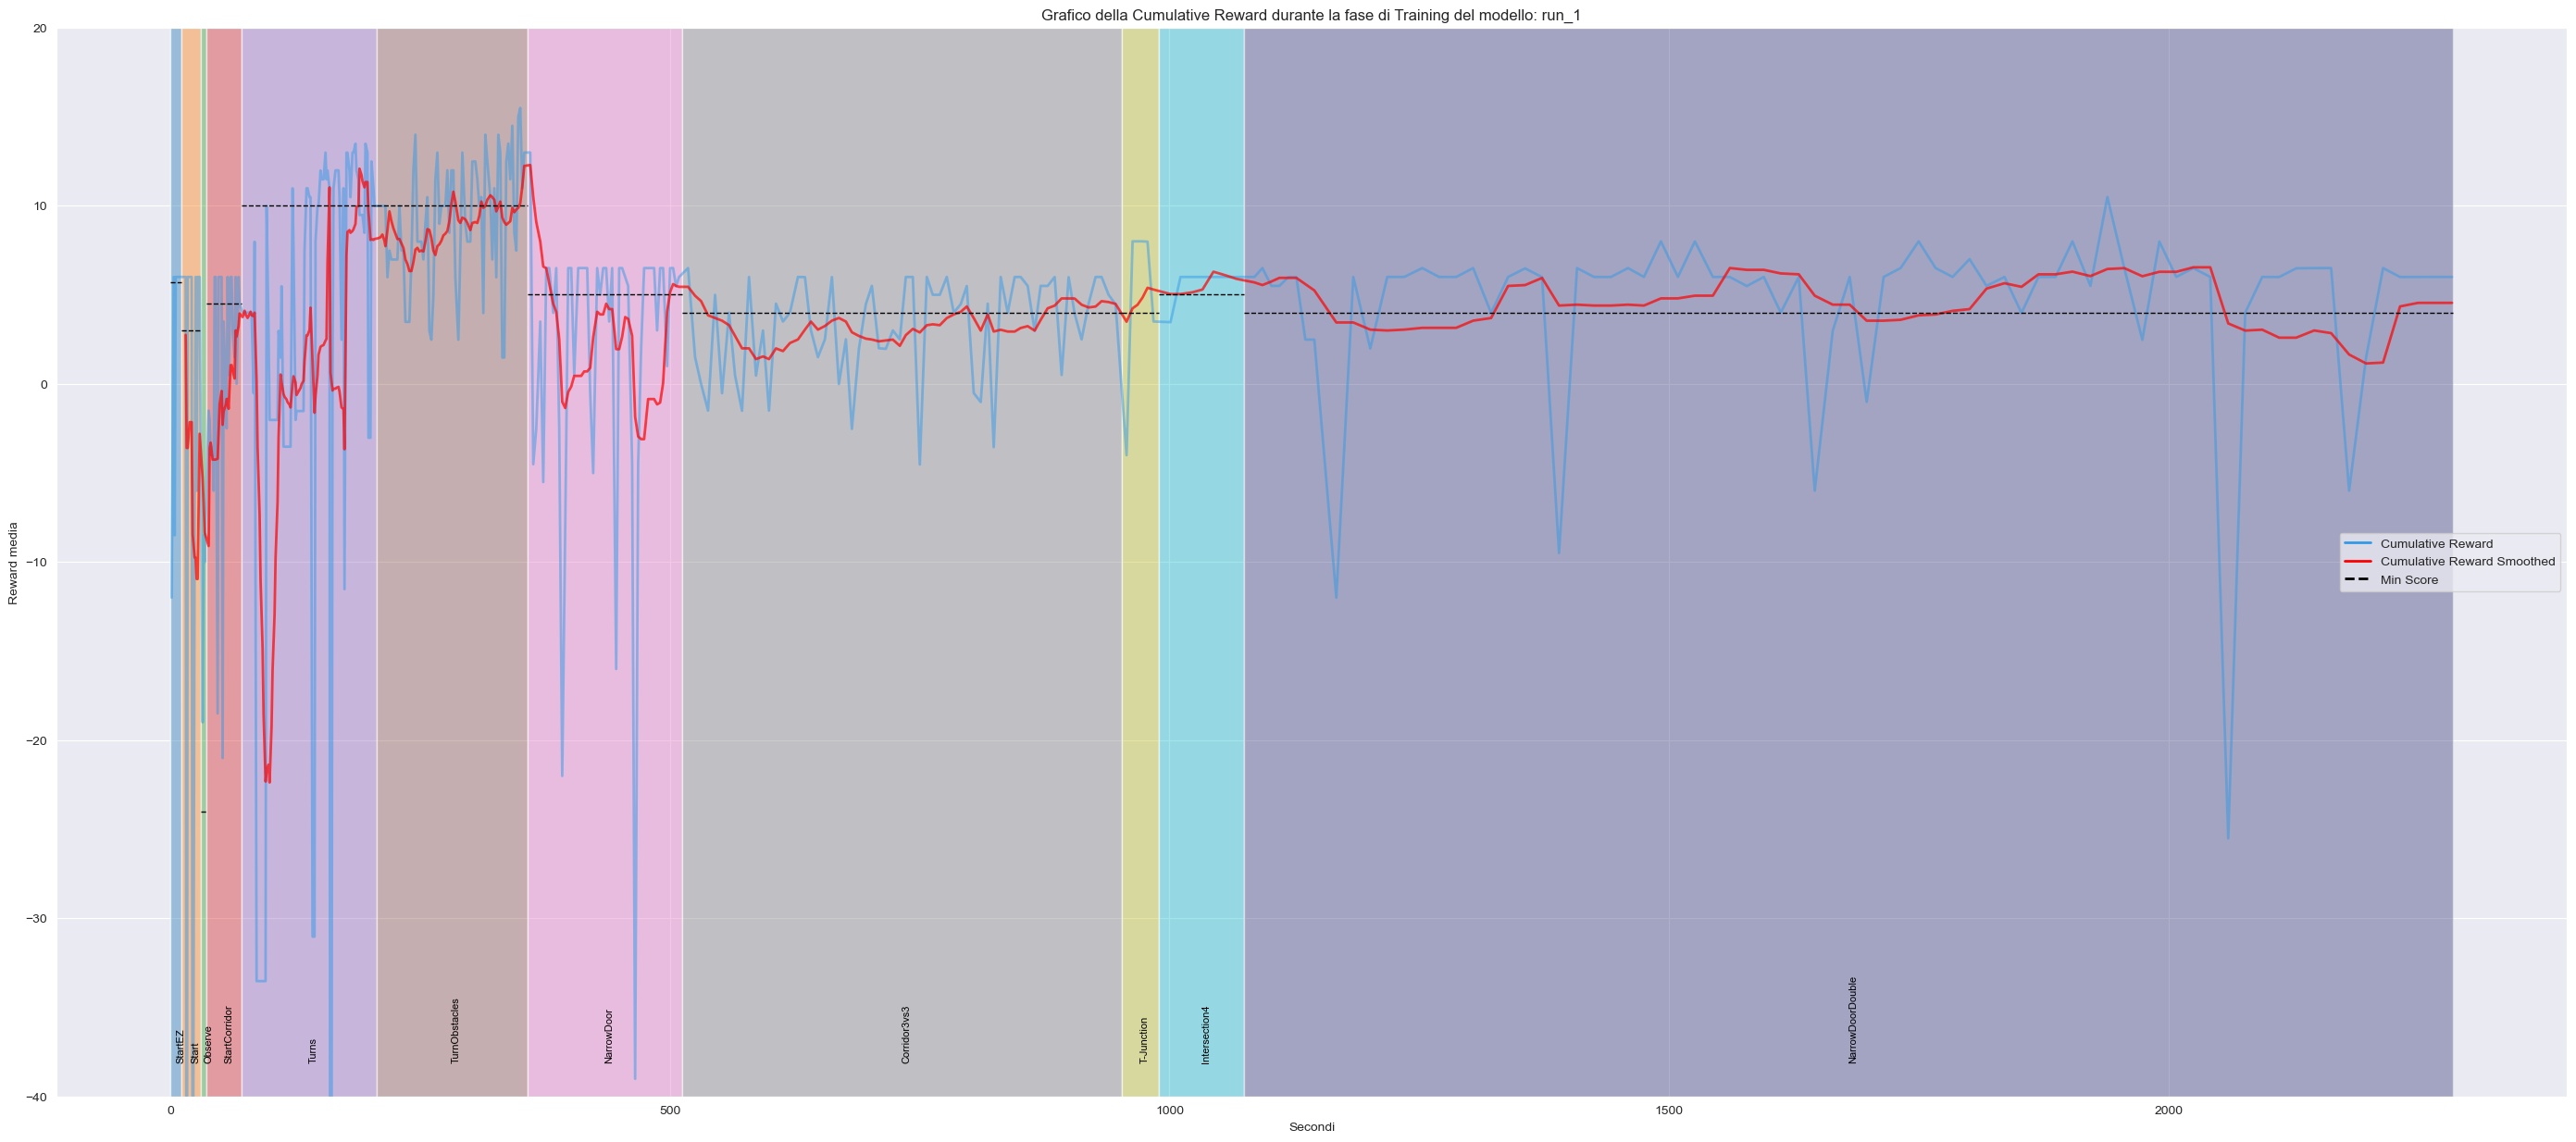

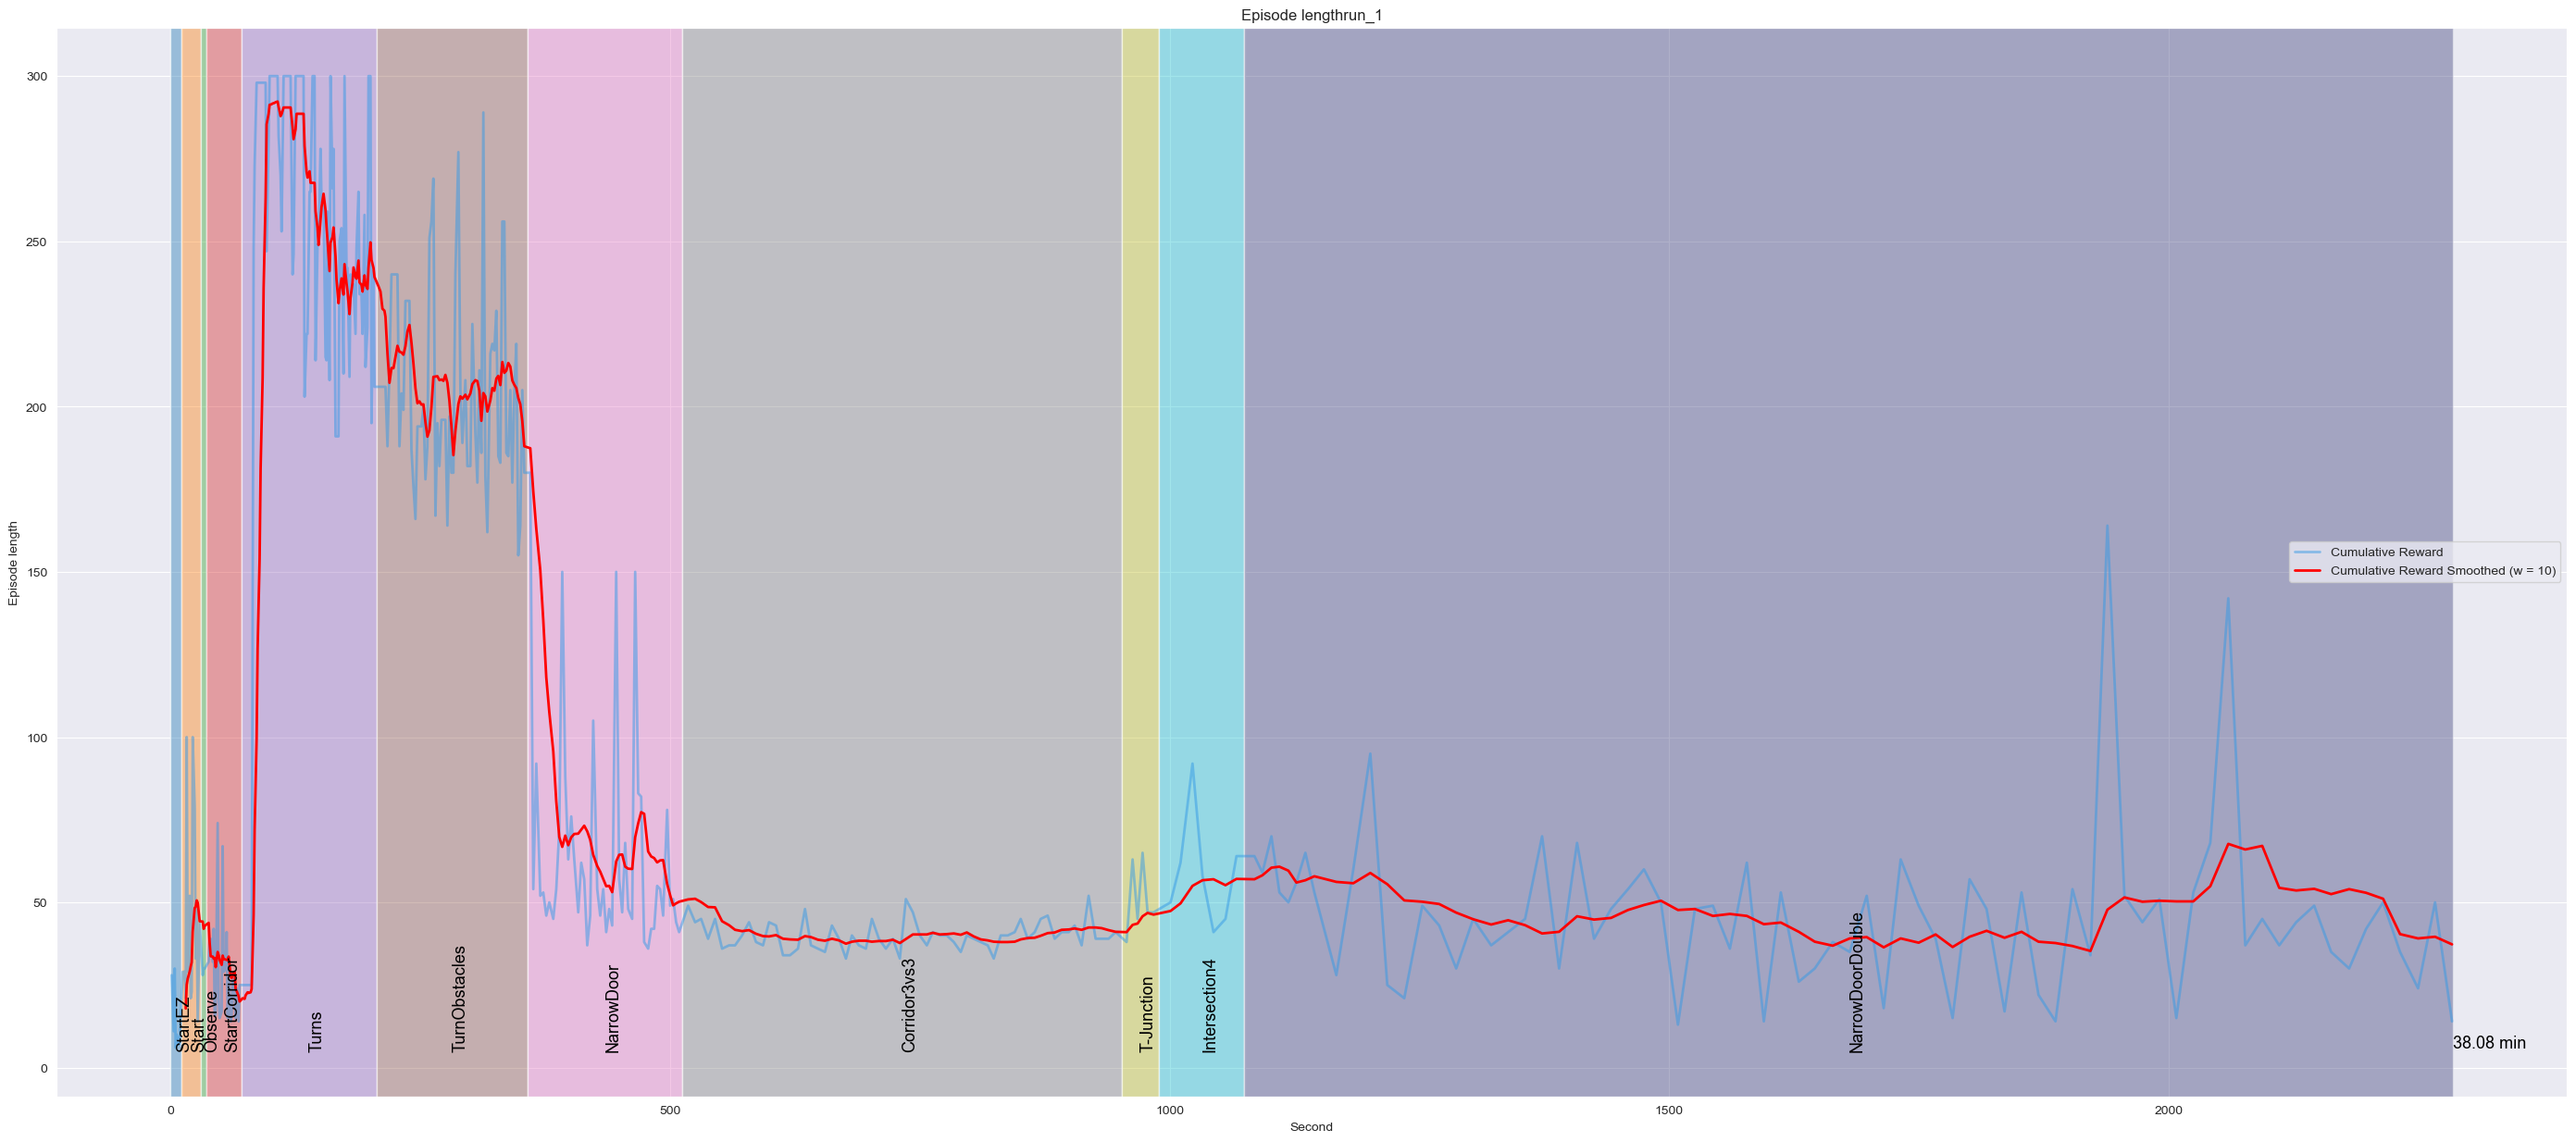

In [65]:
name = "run_1"

pathWall = f"../output/runs/{name}/EnvironmentChanges.txt"

#pathTensorBoard = f"../Stats/{name}/TensorBoard" 
#object_list = os.listdir(pathTensorBoard)

dfWall = pd.read_csv(pathWall, decimal=",",
                        delimiter=";",
                        names=["Time", "Wall","Second", "Environment","MinScore", "Phase"]
                        )
dfWall = dfWall.drop('Time', axis=1)
dfWall = dfWall.drop('Second', axis=1)


dfWall['Wall'] = dfWall['Wall'].astype(int).apply(estrai_ultime_sei_cifre).astype(int)


# dfTrain = dfWall[dfWall["Phase"] == "train"]

# dfRetrain = dfWall[dfWall["Phase"] != "train"]

pathEnvironmentCumulativeReward = f"../output/runs/{name}/tensorboard_export/run-PPO_1-tag-rollout_ep_rew_mean.csv"
pathEnvironmentEpisodeLength = f"../output/runs/{name}/tensorboard_export/run-PPO_1-tag-rollout_ep_len_mean.csv"
#pathIsTraining = f"../Stats/{name}/TensorBoard/run-{name}_Pedone-tag-Is Training.csv"
#pathLossesCuriosityForwardLoss = f"../Stats/{name}/TensorBoard/run-{name}_Pedone-tag-Losses_Curiosity Forward Loss.csv" 
#pathLossesCuriosityInverseLoss = f"../Stats/{name}/TensorBoard/run-{name}_Pedone-tag-Losses_Curiosity Inverse Loss.csv" 
#pathLossesPolicyLoss = f"../Stats/{name}/TensorBoard/run-{name}_Pedone-tag-Losses_Policy Loss.csv" 
#pathLossesValueLoss = f"../Stats/{name}/TensorBoard/run-{name}_Pedone-tag-Losses_Value Loss.csv" 
#pathPolicyCuriosityReward = f"../Stats/{name}/TensorBoard/run-{name}_Pedone-tag-Policy_Curiosity Reward.csv" 
#pathPolicyCuriosityValueEstimate = f"../Stats/{name}/TensorBoard/run-{name}_Pedone-tag-Policy_Curiosity Value Estimate.csv" 
#pathPolicyEntropy = f"../Stats/{name}/TensorBoard/run-{name}_Pedone-tag-Policy_Entropy.csv" 
#pathPolicyExtrinsicReward = f"../Stats/{name}/TensorBoard/run-{name}_Pedone-tag-Policy_Extrinsic Reward.csv" 
#pathPolicyExtrinsicValueEstimate = f"../Stats/{name}/TensorBoard/run-{name}_Pedone-tag-Policy_Extrinsic Value Estimate.csv" 
#pathPolicyLearningRate = f"../Stats/{name}/TensorBoard/run-{name}_Pedone-tag-Policy_Learning Rate.csv" 


# EnvironmentCumulativeReward
dfEnvironmentCumulativeReward = pd.read_csv(pathEnvironmentCumulativeReward, decimal=".",
                        delimiter=",",
                        )
dfEnvironmentCumulativeReward['Wall time'] = dfEnvironmentCumulativeReward['Wall time'].astype(int).apply(estrai_ultime_sei_cifre).astype(int)
graficoTensorEnvironmentCumulativeReward(dfEnvironmentCumulativeReward,dfWall ,name)

if os.path.exists(pathEnvironmentEpisodeLength):

    # EnvironmentEpisodeLength
    dfEnvironmentEpisodeLength = pd.read_csv(pathEnvironmentEpisodeLength, decimal=".",
                            delimiter=",",
                            )
    dfEnvironmentEpisodeLength['Wall time'] = dfEnvironmentEpisodeLength['Wall time'].astype(int).apply(estrai_ultime_sei_cifre).astype(int)
    graficoTensorEnvironmentEpisodeLength(dfEnvironmentEpisodeLength,dfWall ,name)

# if os.path.exists(pathEnvironmentEpisodeLength) and  os.path.exists(pathEnvironmentCumulativeReward):

    # combined graph
    # graficoTensorEnvironmentCombined(dfEnvironmentCumulativeReward, dfEnvironmentEpisodeLength, dfWall ,name)


"""
################################################################################################################################
#Loss graph
if os.path.exists(pathLossesCuriosityForwardLoss):
    dfLossesCuriosityForwardLoss = pd.read_csv(pathLossesCuriosityForwardLoss, decimal=".",
                            delimiter=",",
                            )
    dfLossesCuriosityForwardLoss['Wall time'] = dfLossesCuriosityForwardLoss['Wall time'].astype(int).apply(estrai_ultime_sei_cifre).astype(int)
    # graficoTensorLoss(dfLossesCuriosityForwardLoss,dfWall ,name, "Curiosity Forward Loss")

if os.path.exists(pathLossesCuriosityInverseLoss):
    dfLossesCuriosityInverseLoss = pd.read_csv(pathLossesCuriosityInverseLoss, decimal=".",
                            delimiter=",",
                            )
    dfLossesCuriosityInverseLoss['Wall time'] = dfLossesCuriosityInverseLoss['Wall time'].astype(int).apply(estrai_ultime_sei_cifre).astype(int)
    # graficoTensorLoss(dfLossesCuriosityInverseLoss,dfWall ,name, "Curiosity Inverse Loss")

if os.path.exists(pathLossesPolicyLoss):
    dfLossesPolicyLoss = pd.read_csv(pathLossesPolicyLoss, decimal=".",
                            delimiter=",",
                            )
    dfLossesPolicyLoss['Wall time'] = dfLossesPolicyLoss['Wall time'].astype(int).apply(estrai_ultime_sei_cifre).astype(int)
    # graficoTensorLoss(dfLossesPolicyLoss,dfWall ,name , "Policy Loss")

if os.path.exists(pathLossesValueLoss):
    dfLossesValueLoss = pd.read_csv(pathLossesValueLoss, decimal=".",
                            delimiter=",",
                            )
    dfLossesValueLoss['Wall time'] = dfLossesValueLoss['Wall time'].astype(int).apply(estrai_ultime_sei_cifre).astype(int)
    graficoTensorValueLoss(dfLossesValueLoss,dfWall ,name, "Value Loss")

    # graficoTensorLossCombined(dfLossesCuriosityForwardLoss,dfLossesCuriosityInverseLoss,dfLossesPolicyLoss,dfLossesValueLoss,dfTrain ,name)


    ################################################################################################################################
    #Policy loss

if os.path.exists(pathPolicyEntropy):

    dfPolicyEntropy = pd.read_csv(pathPolicyEntropy, decimal=".",
                            delimiter=",",
                            )
    dfPolicyEntropy['Wall time'] = dfPolicyEntropy['Wall time'].astype(int).apply(estrai_ultime_sei_cifre).astype(int)
    graficoTensorPolicy(dfPolicyEntropy,dfWall ,name , "Entropy")

if os.path.exists(pathPolicyExtrinsicReward):

    dfPolicyExtrinsicReward = pd.read_csv(pathPolicyExtrinsicReward, decimal=".",
                            delimiter=",",
                            )
    dfPolicyExtrinsicReward['Wall time'] = dfPolicyExtrinsicReward['Wall time'].astype(int).apply(estrai_ultime_sei_cifre).astype(int)
    graficoTensorPolicy(dfPolicyExtrinsicReward,dfWall ,name , "Extrinsic Reward")

if os.path.exists(pathPolicyExtrinsicValueEstimate):

    dfPolicyExtrinsicValueEstimate = pd.read_csv(pathPolicyExtrinsicValueEstimate, decimal=".",
                            delimiter=",",
                            )
    dfPolicyExtrinsicValueEstimate['Wall time'] = dfPolicyExtrinsicValueEstimate['Wall time'].astype(int).apply(estrai_ultime_sei_cifre).astype(int)
    graficoTensorPolicy(dfPolicyExtrinsicValueEstimate,dfWall ,name , "Extrinsic Value Estimate")


"""
